In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Hepatitis C virus

In [3]:
url_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00571/hcvdat0.csv'
df = pd.read_csv(url_path, na_values = '?')
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [4]:
# Data Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [6]:
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [7]:
df.drop('Unnamed: 0', axis='columns', inplace=True)
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [8]:
 df.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [9]:
# Imputation

In [10]:
df.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [11]:
df['ALP'] = df['ALP'].fillna(value=df['ALP'].mean())
df['CHOL'] = df['CHOL'].fillna(value=df['CHOL'].mean())
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3=Cirrhosis,64,f,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3=Cirrhosis,46,f,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [12]:
df.isnull().sum()

Category    0
Age         0
Sex         0
ALB         1
ALP         0
ALT         1
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        1
dtype: int64

In [13]:
df.dropna(inplace=True)
df.isnull().any()

Category    False
Age         False
Sex         False
ALB         False
ALP         False
ALT         False
AST         False
BIL         False
CHE         False
CHOL        False
CREA        False
GGT         False
PROT        False
dtype: bool

In [14]:
print(df['Category'].unique())

['0=Blood Donor' '0s=suspect Blood Donor' '1=Hepatitis' '2=Fibrosis'
 '3=Cirrhosis']


In [15]:
df_category=df.Category.map({'0=Blood Donor':'Blood Donor','0s=suspect Blood Donor':'Suspect Blood Donor','1=Hepatitis':'Hepatitis','2=Fibrosis':'Fibrosis','3=Cirrhosis':'Cirrhosis'})
df_category

0      Blood Donor
1      Blood Donor
2      Blood Donor
3      Blood Donor
4      Blood Donor
          ...     
610      Cirrhosis
611      Cirrhosis
612      Cirrhosis
613      Cirrhosis
614      Cirrhosis
Name: Category, Length: 612, dtype: object

In [16]:
df1=df.Category.map({'0=Blood Donor':1,'0s=suspect Blood Donor':2,'1=Hepatitis':3,'2=Fibrosis':4,'3=Cirrhosis':5})
df1

0      1
1      1
2      1
3      1
4      1
      ..
610    5
611    5
612    5
613    5
614    5
Name: Category, Length: 612, dtype: int64

In [17]:
df.drop('Category',axis='columns',inplace=True)

In [18]:
df

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,m,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,m,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,m,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,m,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,m,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,f,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,64,f,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,64,f,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,46,f,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [19]:
df_final = pd.concat([df,df1], axis=1)
df_final

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,32,m,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,1
1,32,m,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1
2,32,m,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1
3,32,m,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,1
4,32,m,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,f,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,5
611,64,f,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,5
612,64,f,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,5
613,46,f,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,5


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612 entries, 0 to 614
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     612 non-null    int64  
 1   Sex     612 non-null    object 
 2   ALB     612 non-null    float64
 3   ALP     612 non-null    float64
 4   ALT     612 non-null    float64
 5   AST     612 non-null    float64
 6   BIL     612 non-null    float64
 7   CHE     612 non-null    float64
 8   CHOL    612 non-null    float64
 9   CREA    612 non-null    float64
 10  GGT     612 non-null    float64
 11  PROT    612 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 62.2+ KB


In [21]:
df_final

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,32,m,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,1
1,32,m,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1
2,32,m,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1
3,32,m,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,1
4,32,m,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,f,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,5
611,64,f,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,5
612,64,f,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,5
613,46,f,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,5


In [40]:
# Creating Dataframe for Visualization.

In [22]:
df_visual = pd.concat([df,df_category], axis=1)
df_visual

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,32,m,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,Blood Donor
1,32,m,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,Blood Donor
2,32,m,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,Blood Donor
3,32,m,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,Blood Donor
4,32,m,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,Blood Donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,f,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,Cirrhosis
611,64,f,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,Cirrhosis
612,64,f,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,Cirrhosis
613,46,f,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,Cirrhosis


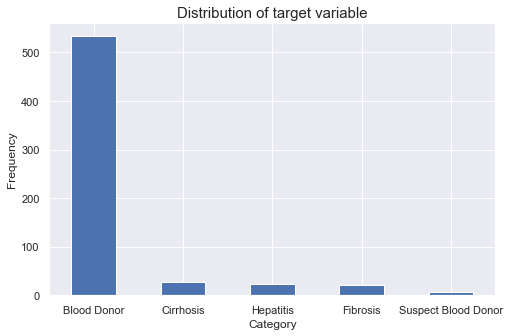

In [23]:
sns.set(style="darkgrid")
df_visual.Category.value_counts().plot(kind="bar",figsize=(8,5))
plt.title('Distribution of target variable',fontsize=15)
plt.xlabel('Category',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.xticks(rotation=0)
plt.show()

m    374
f    238
Name: Sex, dtype: int64


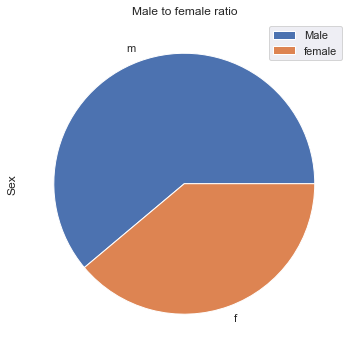

In [24]:
# Gender and its correlation with hepataitis 

print (df_visual['Sex'].value_counts())
df_visual.Sex.value_counts().plot(kind = 'pie', figsize = (8,6))
plt.title('Male to female ratio')
plt.legend(['Male','female'])

sns.set(style="darkgrid")
pd.crosstab(df_visual.Age, df_visual.Category == 'Hepatitis').plot(kind="bar", figsize=(20, 6), ax=plt.gca())
plt.title("Hepatitis C v/s Age",fontsize=20)
plt.legend(["Donot have Hepatitis", "Have Hepatitis"])
plt.xlabel("Age",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()

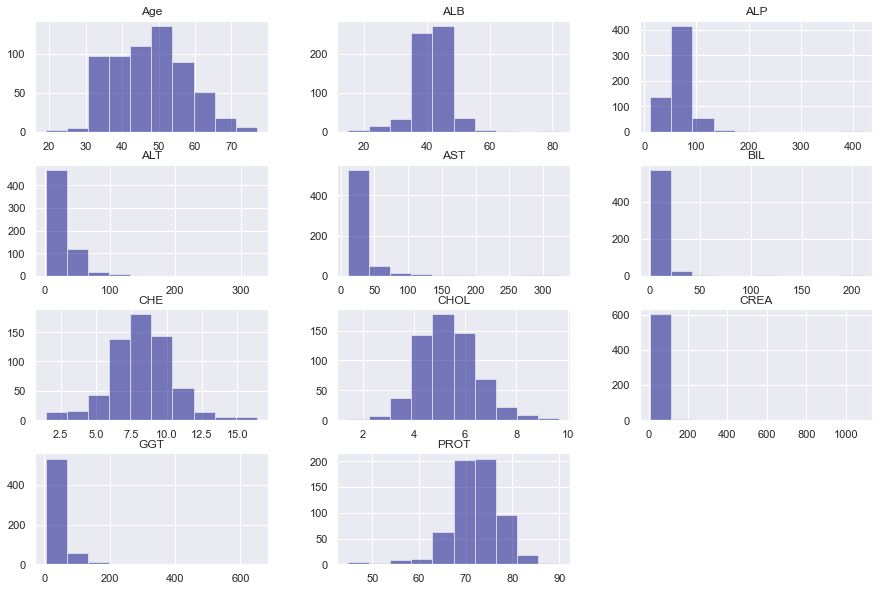

In [25]:
sns.set(style="darkgrid")
df_visual.hist(bins=10,figsize=(15,10) ,color = 'navy', alpha = 0.5)
plt.show()

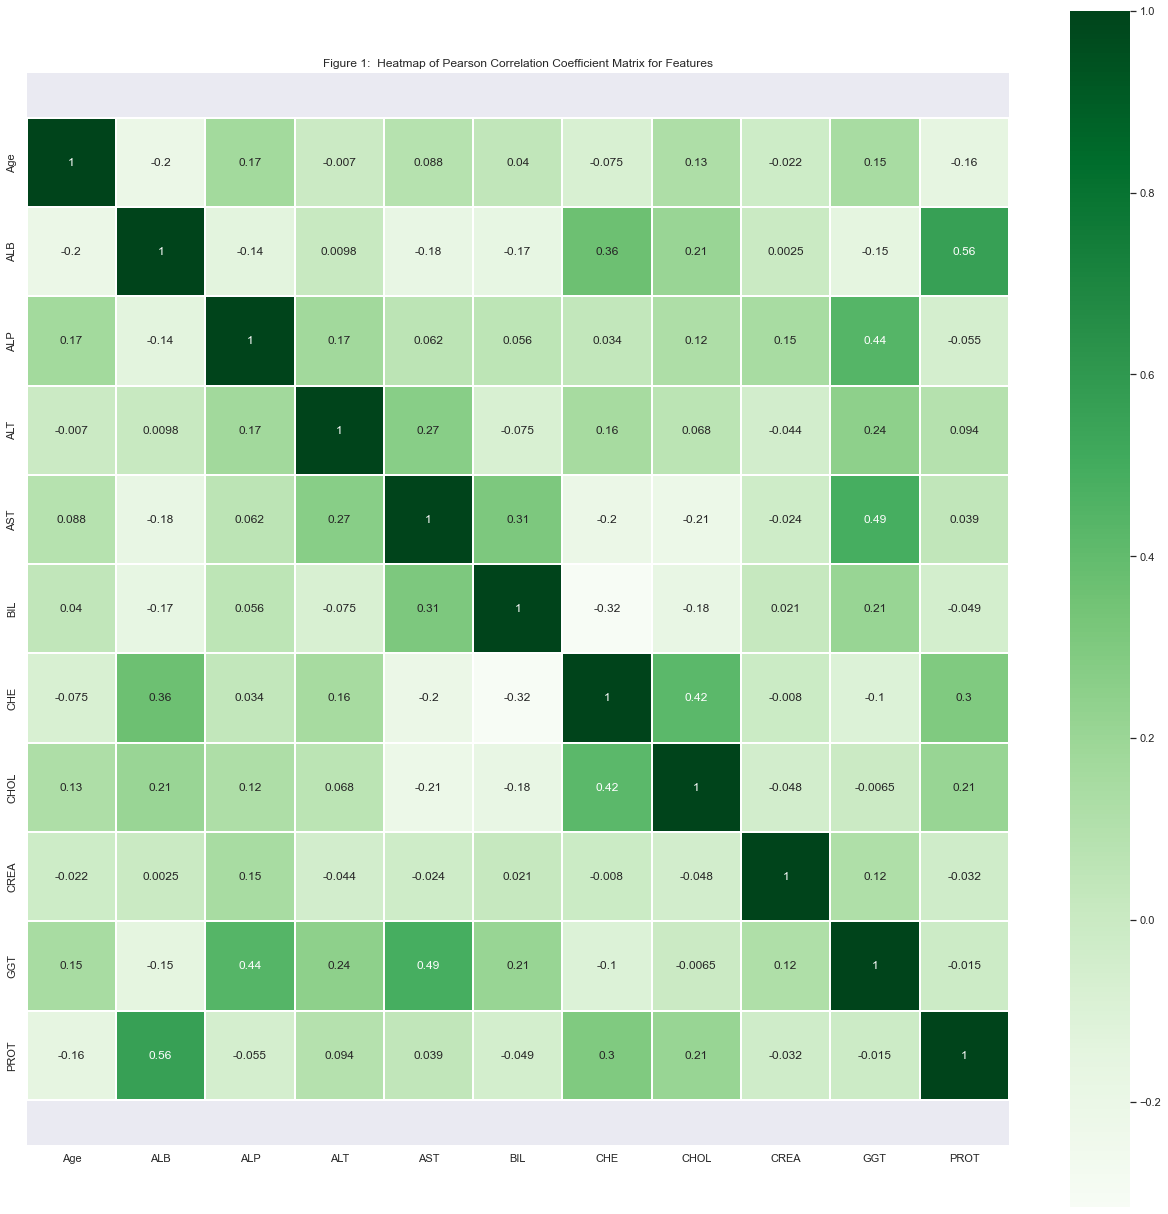

In [26]:
fix,ax = plt.subplots(figsize=(22,22))
heatmap_data = df
sns.heatmap(heatmap_data.corr(),vmax=1,linewidths=0.01,
            square=True,annot=True,linecolor="white", cmap='Greens')
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
heatmap_title='Figure 1:  Heatmap of Pearson Correlation Coefficient Matrix for Features'
ax.set_title(heatmap_title)
plt.show()

In [27]:
df_final['Sex'] = df_final.Sex.map({'m':0,'f':1})
df_final

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,32,0,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,1
1,32,0,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1
2,32,0,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1
3,32,0,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,1
4,32,0,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,1,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,5
611,64,1,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,5
612,64,1,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,5
613,46,1,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,5


In [41]:
#The target attribute for classification is Category (blood donors vs. Hepatitis C (including its progress ('just' Hepatitis C, Fibrosis, Cirrhosis).

In [28]:

df_final['Category'] = np.where((df_final['Category']<3),0,1)
df_final

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,32,0,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0
1,32,0,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0
2,32,0,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0
3,32,0,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0
4,32,0,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,1,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,1
611,64,1,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,1
612,64,1,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,1
613,46,1,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,1


In [29]:
# Scaling so that model trains better and does not overfit wrong features
X = df_final.drop(['Category'], axis= 1)
y= pd.DataFrame(df_final['Category'])

# # Scale Data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X=MinMaxScaler().fit_transform(X.values)
X = pd.DataFrame(X)
X.columns=(df_final.drop(['Category'], axis= 1)).columns

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42) 


In [31]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, f1_score, accuracy_score, recall_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [32]:
accuracies = {}

lr = LogisticRegression()
lr.fit(X_train, y_train)

# getting the training Set Predictions0
y_train_pred = lr.predict(X_train)

# getting the test Set Predictions
y_test_pred = lr.predict(X_test)

acc = lr.score(X_test, y_test) * 100
accuracies["Logistic Regression"] = acc
acc

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


89.43089430894308

In [33]:
print(classification_report(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       471
           1       0.30      0.94      0.46        18

    accuracy                           0.92       489
   macro avg       0.65      0.93      0.71       489
weighted avg       0.97      0.92      0.94       489



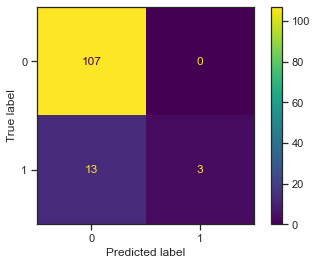

In [34]:
sns.set(style="ticks")
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)
plt.show()

In [35]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_train_pred2 = nb.predict(X_train)
y_test_pred2 = nb.predict(X_test)

acc = nb.score(X_test, y_test) * 100
accuracies["Naive Bayes"] = acc

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
print(classification_report(y_train_pred2,y_train))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       436
           1       0.70      0.74      0.72        53

    accuracy                           0.94       489
   macro avg       0.83      0.85      0.84       489
weighted avg       0.94      0.94      0.94       489



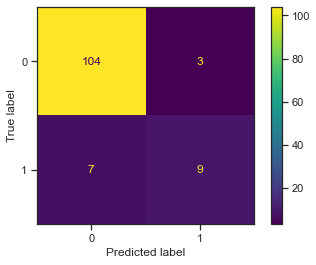

In [39]:
ConfusionMatrixDisplay.from_estimator(nb, X_test, y_test)
plt.show()

In [37]:
accuracies

{'Logistic Regression': 89.43089430894308, 'Naive Bayes': 91.869918699187}